# Visualization of beer style preferences across U.S. states

In [1]:
import pathlib
import numpy as np

data_dir_path = pathlib.Path("../../data")

from src.plots import plotting_utils
from src.data import reviews_processing, load_and_find_party_winners

In [12]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Loading the data
We are interested in identifying average scores for each of 7 most popular beer styles, for each U.S. state, in years 2004-2016.  
To acquire this information, we use the code from the `reviews_processing.py` script, which combines information from users (to obtain their location), and the scores of beer reviews. Additionally, the beer styles are mapped into 8 most popular styles: IPA, Lager, Pale Ale, Pilsner, Porter, Red/Amber Ale, Stout, and Other Ales.  
The resulting table is in the `results` dataframe.  
We also incorporate information about the party that had the majority of votes in each state for each of the election years in that period: 2004, 2008, 2012, and 2016. This information is loaded and processed in the `winners` dataframe by a `load_and_find_party_winners.py` script. 

In [13]:
users_path = data_dir_path / "BeerAdvocate" / "users.csv"
reviews_path = data_dir_path / "generated" / "reviews_df.csv"
sentiment_path = data_dir_path / "generated" / "reviews2_df.pkl"

users_reviews = reviews_processing.Reviews(users_path, sentiment_path)
year_list = list(np.arange(2004, 2017, 1, dtype=int))
results = users_reviews.aggregate_preferences_year(year_list)

In [14]:
winners_path = data_dir_path / "generated" / "party_winners_over_years.csv"
winners = load_and_find_party_winners.state_winner_years(winners_path)

### Some examples of beer style preference trends: New York & California (democrat states)



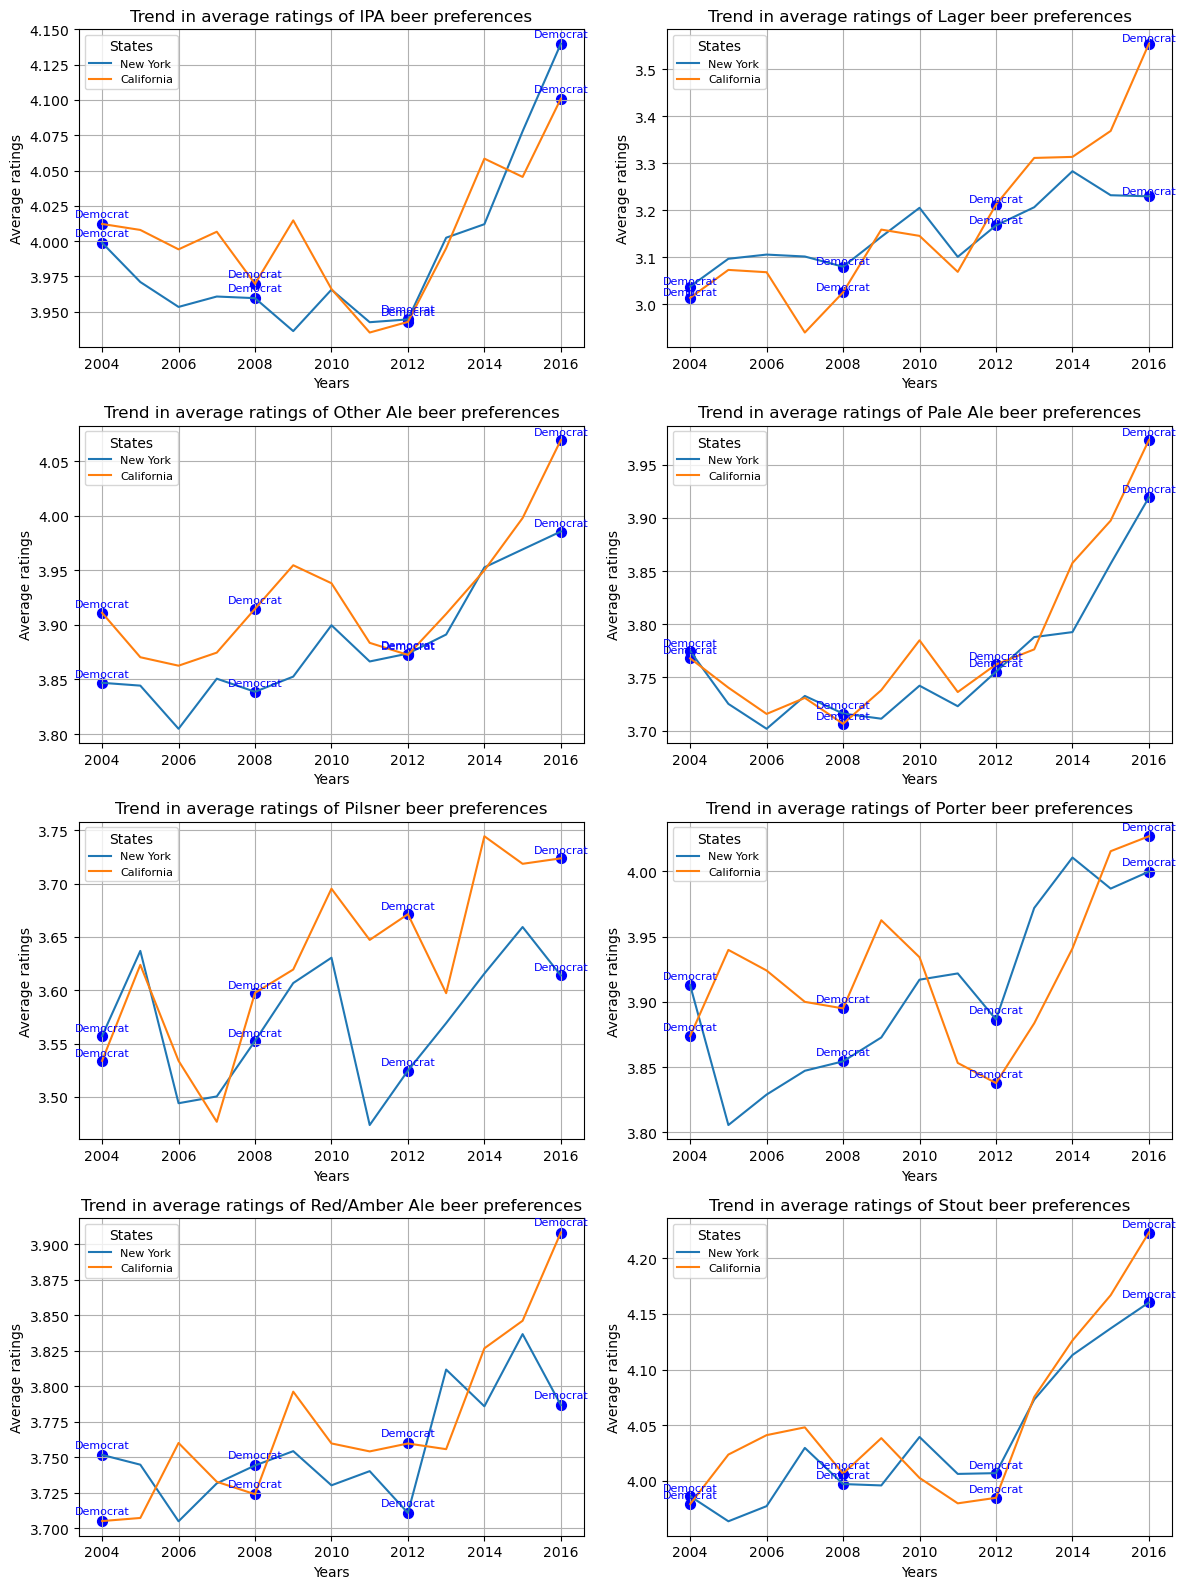

In [15]:
cluster_1 = ['New York', 'California']
plotting_utils.plot_beer_pref_trends(results, winners, cluster_1)

### Arizona & Texas (republican states)

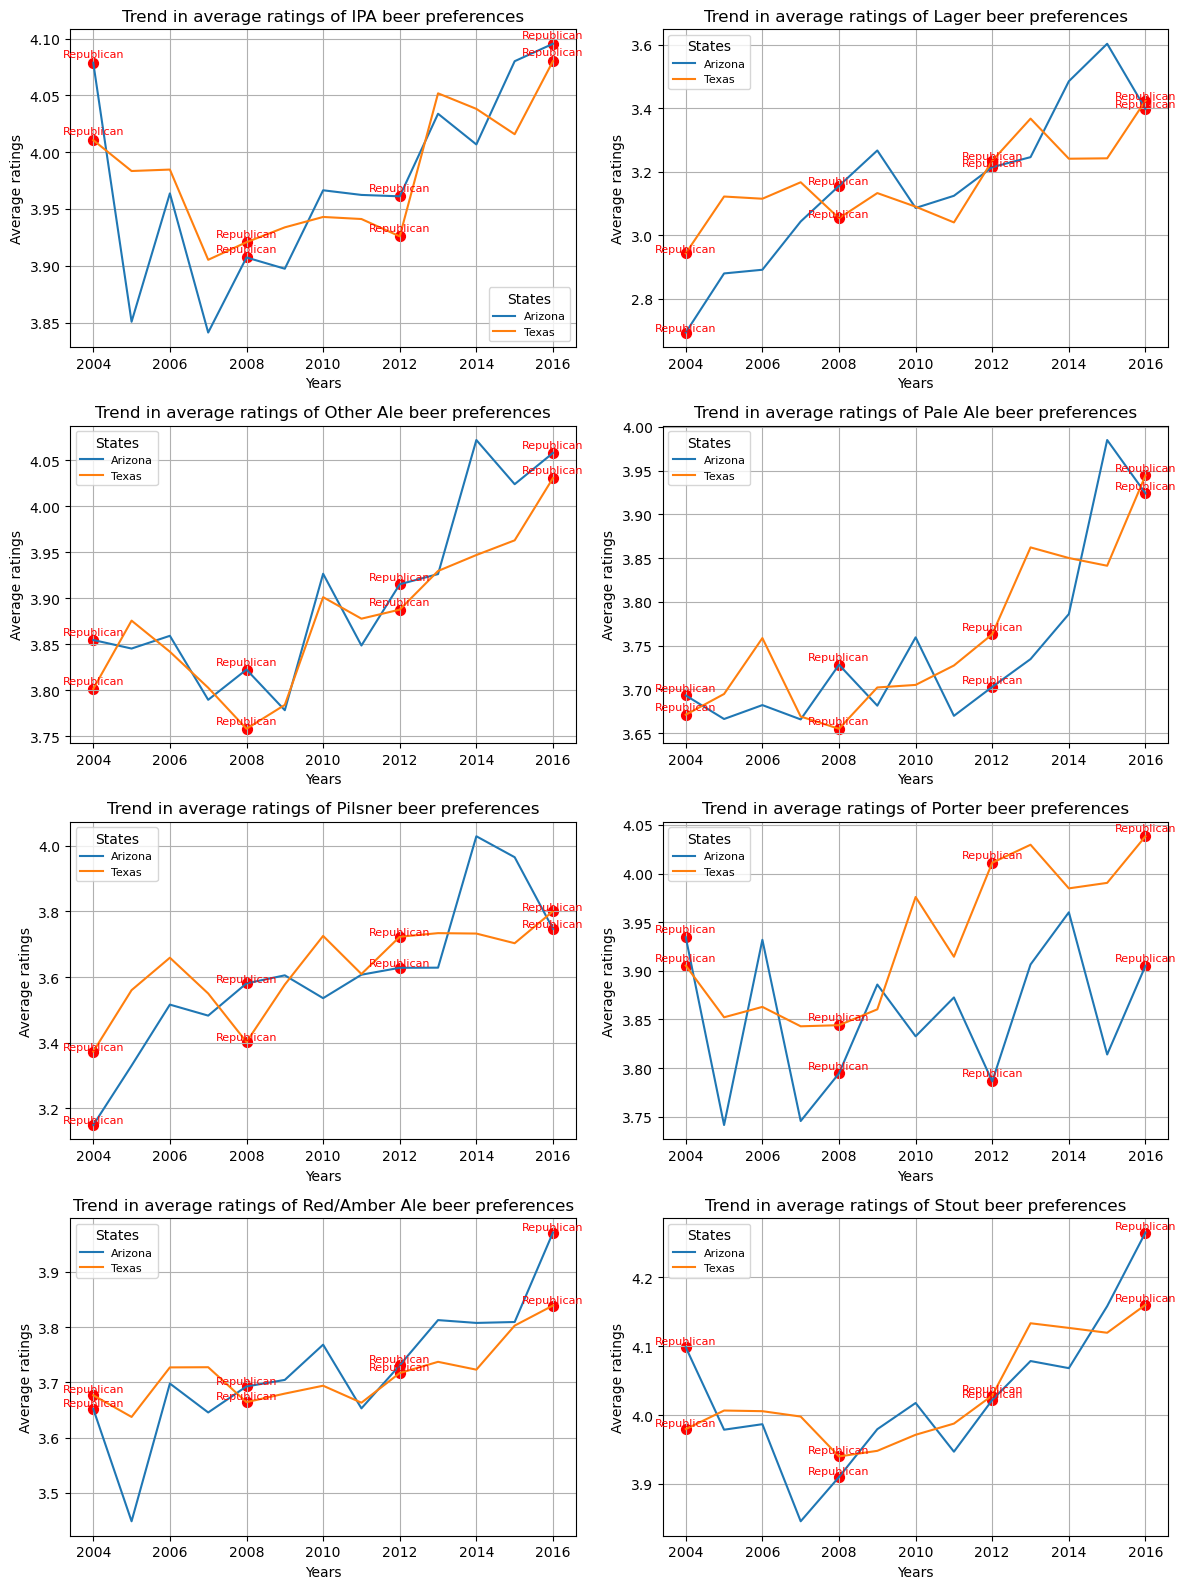

In [16]:
cluster_2 = ['Arizona', 'Texas']
plotting_utils.plot_beer_pref_trends(results, winners, cluster_2)